## Logistic Regression Assignment

### Objective - Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('F:\ExcelR Assingment\Csv Files\Logistic Regression/bank-full.csv', sep=';')

In [3]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

## Null value & data type check

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### There is no null value present in side the data and also the data types of all attributes are appropriate

# Checking which attributes have good impact to predict whether the cilent has subscribed a term deposit or not

<AxesSubplot:xlabel='y', ylabel='count'>

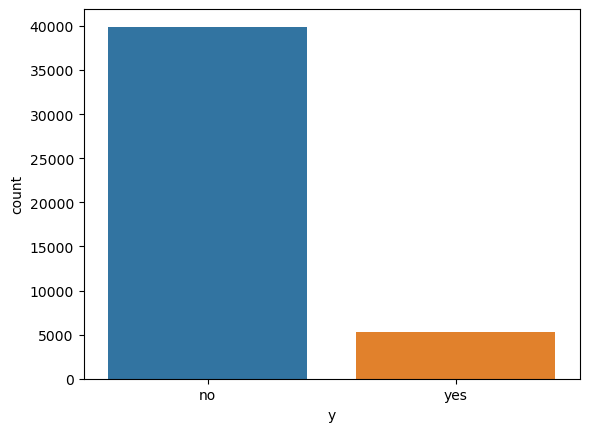

In [7]:
sns.countplot(x='y',data=bank)

Text(0, 0.5, 'Frequency of Purchase')

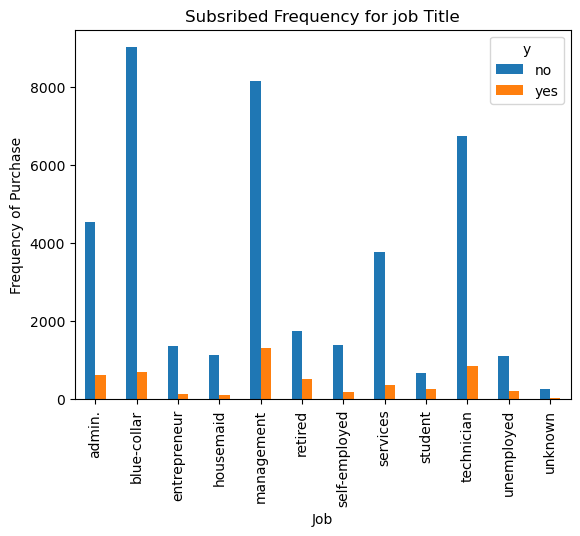

In [8]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title("Subsribed Frequency for job Title")
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

## All occupation have different type of subscription so it is import feature

Text(0, 0.5, 'Proportion of Customers')

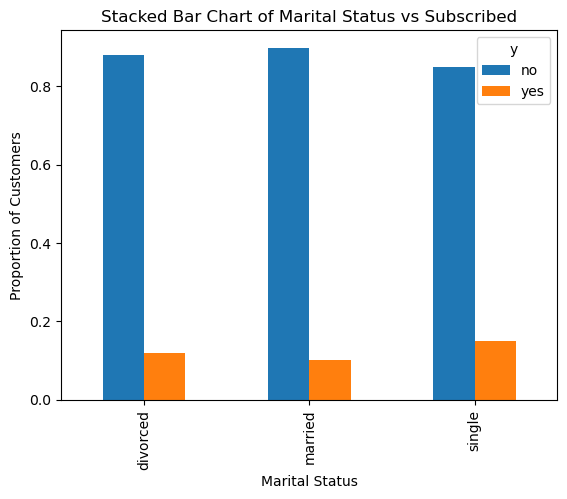

In [9]:
table = pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked = False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

### AS per graph we can see all status have same frequency so it is no important feature

Text(0, 0.5, 'Proportion of Customers')

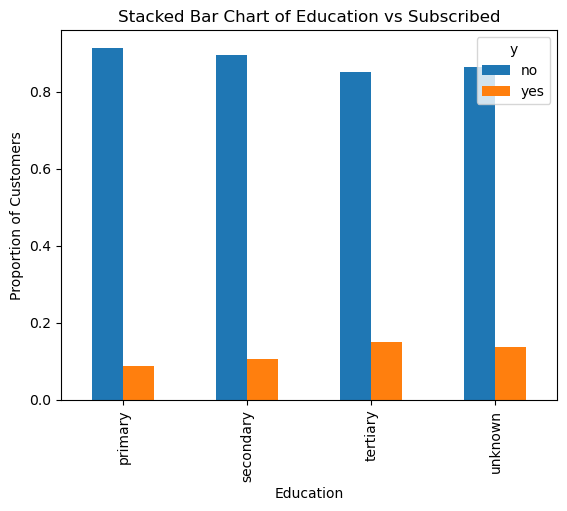

In [10]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0, 0.5, 'Frequency of Subsribe')

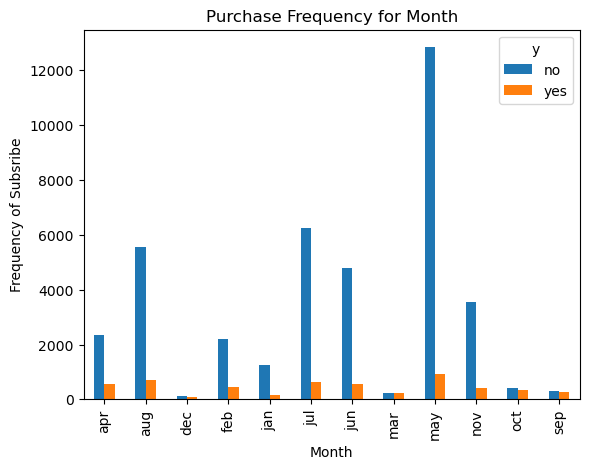

In [11]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')

<AxesSubplot:title={'center':'age'}, xlabel='y'>

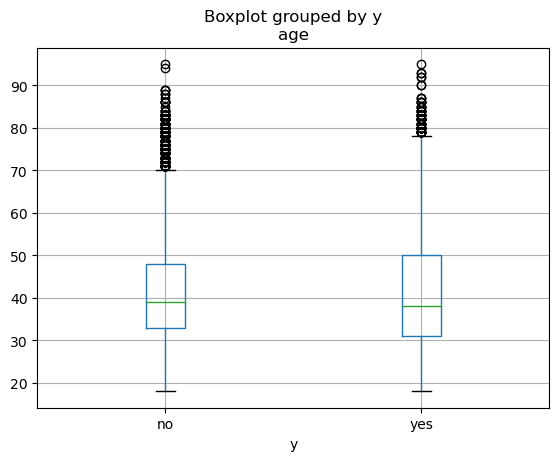

In [12]:
bank.boxplot(column='age',by='y')

Text(0, 0.5, 'Frequency of Subscibe')

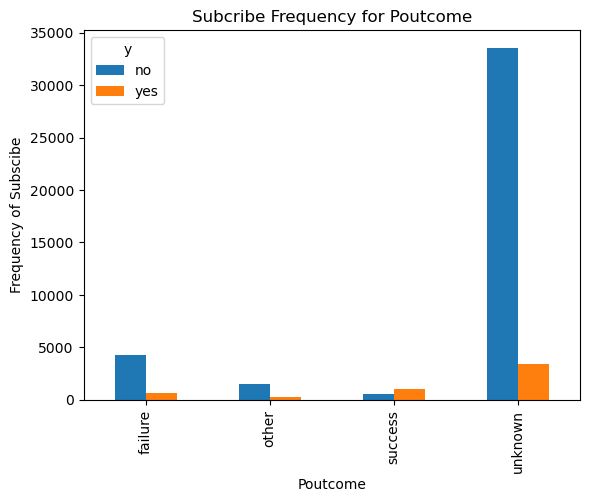

In [13]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subcribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscibe')

### Day means last contact day of the month on the basis of it we can't say client will purchase or not

### Campaign means number of contacts performed during this campaign  and for this client it may be baised & depend on client to client it is not important feature

### Pdays means number of days that passed by after the client was last contacted from a previous campaign it same as the campaign feature

### Loan & housing loan don't have important role in predict client subscribe or not

In [14]:
bank.drop(["month","education","pdays","day","campaign","age","loan","housing","marital"],axis=1,inplace=True)

In [15]:
bank.head(3)

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no


## We will create dummy variable for categorical data

In [16]:
contact_d=pd.get_dummies(bank['contact'],drop_first=True)
contact_d.columns

Index(['telephone', 'unknown'], dtype='object')

In [17]:
job_d=pd.get_dummies(bank['job'],drop_first=True)
job_d.columns

Index(['blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [18]:
poutcome_d=pd.get_dummies(bank['poutcome'],drop_first=True)
poutcome_d.columns

Index(['other', 'success', 'unknown'], dtype='object')

In [19]:
default_d=pd.get_dummies(bank['default'],drop_first=True)
default_d.columns

Index(['yes'], dtype='object')

In [20]:
# Concate the dummy varibles
bank = pd.concat([bank,default_d,poutcome_d,job_d,contact_d],axis=1)
bank.head(3)

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1


## We will drop the exist categorical columns for whome we have make dummy variable

In [21]:
bank.drop(['default','poutcome','job','contact'],axis=1,inplace = True)
bank.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
bank.columns

Index(['balance', 'duration', 'previous', 'y', 'yes', 'other', 'success',
       'unknown', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown', 'telephone', 'unknown'],
      dtype='object')

In [23]:
## Map the output variable for converting categorical to numercal data & create new dataframe
bank_new = bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new.head(3)

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


## Predicting for categorical variable we will create logistic regression model

In [24]:
# Assigne the input and output variables in x and y
X = bank.drop("y",axis=1)
Y = bank["y"]

In [25]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [26]:
# Prediction probability of output
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

array([[0.97641298, 0.02358702],
       [0.98507758, 0.01492242],
       [0.99002703, 0.00997297],
       ...,
       [0.00853711, 0.99146289],
       [0.88228262, 0.11771738],
       [0.87914441, 0.12085559]])

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print(cm,accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


## Accuray of model is 90% it is good model

In [28]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



## ROC Curve

In [29]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

y_predict = label_encoder.fit_transform(y_pred)

y_actual = label_encoder.fit_transform(bank_new['y'])

Text(0, 0.5, 'True Positive Rate')

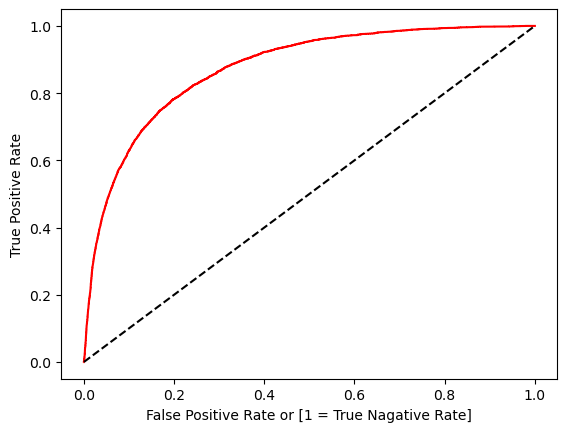

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label='logit model(area = %0.2f)'%auc)

plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 = True Nagative Rate]')
plt.ylabel('True Positive Rate')

In [31]:
auc
## Area under the curve

0.6477134406230929

## Conclusion:
###                We have created model with approprite feature & get around 90% accuracy for prediction of client will subsribe the term deposit or not but as per some internel parameters I observed that

###                AS per ROC curve we found that area under curve is 64.8% it means approx 65% we can predict perfactly true positive rate it is biased because our dataset has been a large frequency of negative result

###               Second thing precision, senstivity (true positive rate), Specificity(true negative rate), f1score also biased of our dataset has been a large frequency of negative result.

###              precision recall f1-score support

###              no 0.92 0.98 0.95 39922

###              yes 0.65 0.32  0.43  5289


##            So we can say this is average model prediction for client will be subscibed or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
[[39005   917]
 [ 3605  1684]] 0.8999800933401163
              precision    recall  f1-score   sup

0.6477134406230929

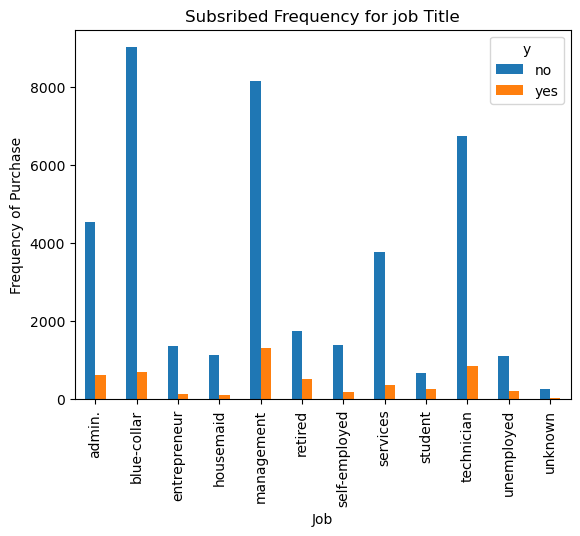

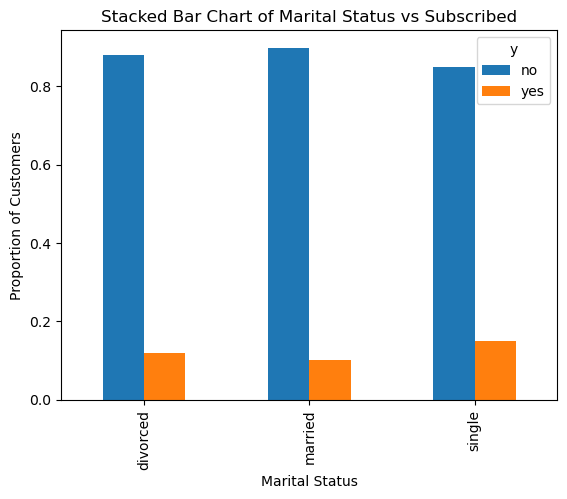

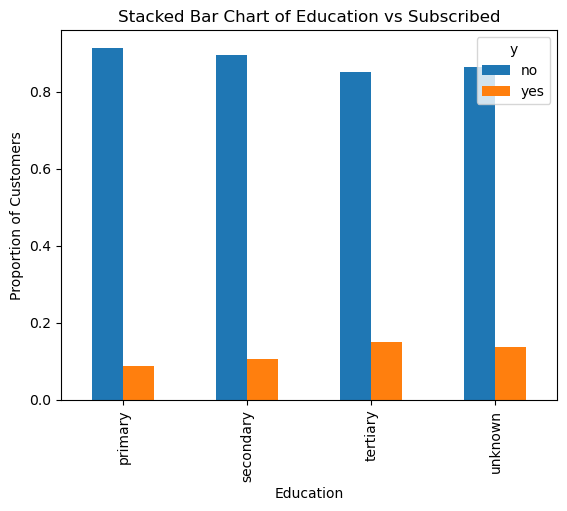

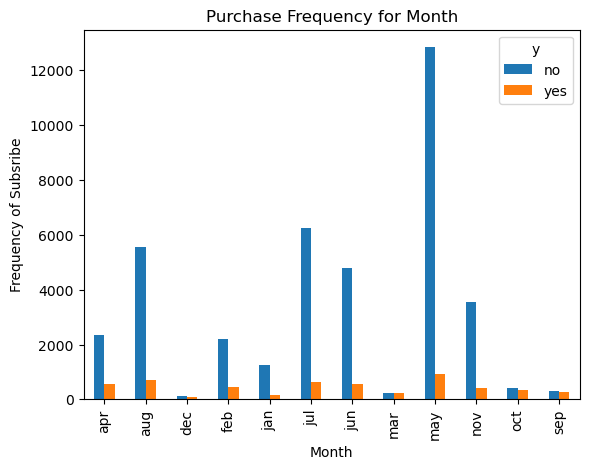

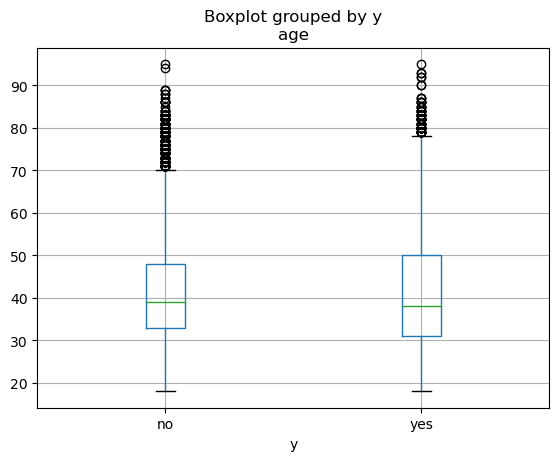

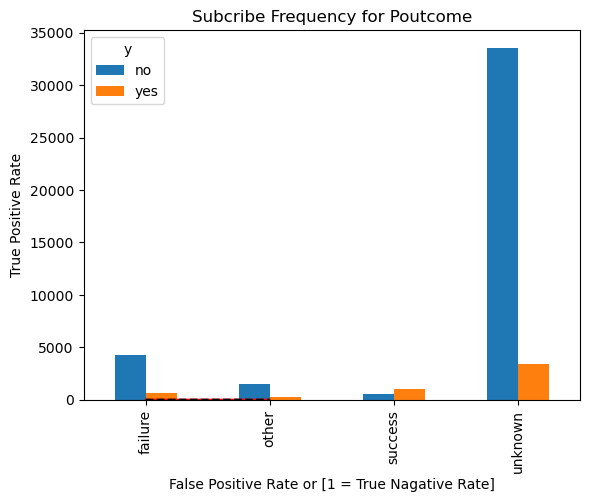

In [32]:
# Logistic Regression Assignment

# Dataset : bank-full

### Objective - Whether the client has subscribed a term deposit or not

import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

bank = pd.read_csv('F:\ExcelR Assingment\Csv Files\Logistic Regression/bank-full.csv', sep=';')

bank.head(3)

bank.shape

# Null value & data type check

bank.info()

bank.isna().sum()

### There is no null value present in side the data and also the data types of all attributes are appropriate

# Checking which attributes have good impact to predict whether the cilent has subscribed a term deposit or not

sns.countplot(x='y',data=bank)

%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title("Subsribed Frequency for job Title")
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

### As per graph we can see

# All occupation have different type of subscription so it is import feature

table = pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked = False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

### AS per graph we can see all status have same frequency so it is no important feature

table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')

bank.boxplot(column='age',by='y')

pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subcribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscibe')

### Day means last contact day of the month on the basis of it we can't say client will purchase or not

### Campaign means number of contacts performed during this campaign  and for this client it may be baised & depend on client to client it is not important feature

### Pdays means number of days that passed by after the client was last contacted from a previous campaign it same as the campaign feature

### Loan & housing loan don't have important role in predict client subscribe or not

bank.drop(["month","education","pdays","day","campaign","age","loan","housing","marital"],axis=1,inplace=True)

bank.head(3)

# We will create dummy variable for categorical data

contact_d=pd.get_dummies(bank['contact'],drop_first=True)
contact_d.columns

job_d=pd.get_dummies(bank['job'],drop_first=True)
job_d.columns

poutcome_d=pd.get_dummies(bank['poutcome'],drop_first=True)
poutcome_d.columns

default_d=pd.get_dummies(bank['default'],drop_first=True)
default_d.columns

# Concate the dummy varibles
bank = pd.concat([bank,default_d,poutcome_d,job_d,contact_d],axis=1)
bank.head(3)

# We will drop the exist categorical columns for whome we have make dummy variable

bank.drop(['default','poutcome','job','contact'],axis=1,inplace = True)
bank.head()

bank.columns

## Map the output variable for converting categorical to numercal data & create new dataframe
bank_new = bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new.head(3)

# Predicting for categorical variable we will create logistic regression model

# Assigne the input and output variables in x and y
X = bank.drop("y",axis=1)
Y = bank["y"]

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

# Prediction probability of output
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print(cm,accuracy)

# Accuray of model is 90% it is good model

from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

# ROC Curve

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

y_predict = label_encoder.fit_transform(y_pred)

y_actual = label_encoder.fit_transform(bank_new['y'])

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label='logit model(area = %0.2f)'%auc)

plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate or [1 = True Nagative Rate]')
plt.ylabel('True Positive Rate')

auc
## Area under the curve

# Conclusion:
###                We have created model with approprite feature & get around 90% accuracy for prediction of client will subsribe the term deposit or not but as per some internel parameters I observed that

###                AS per ROC curve we found that area under curve is 64.8% it means approx 65% we can predict perfactly true positive rate it is biased because our dataset has been a large frequency of negative result

###               Second thing precision, senstivity (true positive rate), Specificity(true negative rate), f1score also biased of our dataset has been a large frequency of negative result.

###              precision recall f1-score support

###              no 0.92 0.98 0.95 39922

###              yes 0.65 0.32  0.43  5289


#            So we can say this is avarage model prediction for client will be subscibed or not

